# Etape 1 : Preparation des données (Data Cleaning)

In [1]:
#Importer les packages
import pandas as pd #Permet de mettre les données dans un dataframe et de les manipuler
import numpy as np 
import matplotlib.pyplot as plt #Sert à la visualisation
import seaborn as sns #Sert à la visualisation
import pickle #Permet de deployer le model dans notre future application
from sklearn.preprocessing import LabelEncoder #permet de converir les variables categorique en binaires
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  
import os

In [2]:
#Importer la base de donnée
#Pour cela tu uplot le fichier et ensuite tu copie son nom et tu le met dans le fonction
os.chdir('../') #Changer le répertoire de travail pour le dossier DataSet
df = pd.read_csv('./DataSet/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Pour parcourir toute la base de donées

pd.set_option('display.max_rows', df.shape[0]+1)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
#Pour afficher uniquement 10 lignes et pas toutes
pd.set_option('display.max_rows',10)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
#Afficher les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [9]:
#Afficher des données statisques des colonnes de type numerique
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#Afficher des données statisques des colonnes de type categorique
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Nous allons renseigner les valeurs manquantes
Tu dois savoir qu'il y'a beaucoup de facon differente de renseigner des valeurs manquantes, et cela depends de plusieur chose et surtout du contexte, dans notre cas nous avons decidé de remplacer les valeurs manquante categorique par la valeur qui a la plus grande occurence et les valeurs numerique on va remplacer par la valeur de la ligne qui la precede 

### Nous allons diviser la base de donées en 02, une avec des variables numeriques et l'autres avec des variables categorique

In [11]:
#creons des listes
cat_data =[]
num_data =[]
for i,c in enumerate(df.dtypes) : 
    if c==object : 
        cat_data.append(df.iloc[:, i]) #iloc[:,i] recupere tout les lignes de la colone d'ordre i
    else :
        num_data.append(df.iloc[:, i])

In [12]:
num_data

[0      5849
 1      4583
 2      3000
 3      2583
 4      6000
        ... 
 609    2900
 610    4106
 611    8072
 612    7583
 613    4583
 Name: ApplicantIncome, Length: 614, dtype: int64,
 0         0.0
 1      1508.0
 2         0.0
 3      2358.0
 4         0.0
         ...  
 609       0.0
 610       0.0
 611     240.0
 612       0.0
 613       0.0
 Name: CoapplicantIncome, Length: 614, dtype: float64,
 0        NaN
 1      128.0
 2       66.0
 3      120.0
 4      141.0
        ...  
 609     71.0
 610     40.0
 611    253.0
 612    187.0
 613    133.0
 Name: LoanAmount, Length: 614, dtype: float64,
 0      360.0
 1      360.0
 2      360.0
 3      360.0
 4      360.0
        ...  
 609    360.0
 610    180.0
 611    360.0
 612    360.0
 613    360.0
 Name: Loan_Amount_Term, Length: 614, dtype: float64,
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 609    1.0
 610    1.0
 611    1.0
 612    1.0
 613    0.0
 Name: Credit_History, Length: 614, dtype: f

In [13]:
cat_data = pd.DataFrame(cat_data)
cat_data

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Property_Area,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Semiurban,Urban,Semiurban,...,Semiurban,Urban,Semiurban,Rural,Rural,Rural,Rural,Urban,Urban,Semiurban
Loan_Status,Y,N,Y,Y,Y,Y,Y,N,Y,N,...,Y,N,Y,Y,Y,Y,Y,Y,Y,N


In [14]:
cat_data = pd.DataFrame(cat_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [15]:
num_data = pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [16]:
#renseignons les données manquantes pour les variables catégoriques
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

#### #1 On va utiliser apply() pour modifier les variables de notre data
#### #2 On va utiliser lambda x: pour parcourir tous les x colones  de notre data
####  #3 On va appliqueer fillna() à chaque colonnes pour modifier les valeurs manquantes de celle ci
####  #4 On va utiliser value_counts() pour visualiser le nombres d'occurences de chaque variables catégorique
####  #5 On va choisir index[0] car comme tu pourras le voir dans l'exemple, cette fonction va retourner la categorie avec le plus d'occurences à l'indice 0

In [17]:
#On va utiliser value_counts() pour visualiser le nombres d'occurences de chaque variables catégorique
cat_data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
# Pour les variables numeriques 
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

C:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Temp\ipykernel_28432\3762885015.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


np.False_

Pour permettre a l'algorithme de travailler avec les variables categoriques nous allons les transformer en numerique par exemple pour la target variable YES=1 et NO=0 

In [19]:
#transformons la colonne target
target_value = {'Y':1, 'N':0}

#Identifions notre variable target et supprimons là !
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

#Remplacons les variables actuelle de cette variable par la 0 et 1 de notre target_value
target= target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [20]:
#transformons la colonne Self_Employed
Self_Employed_value = {'Yes':1, 'No':0}


#Remplacons 
cat_data['Self_Employed'] = cat_data['Self_Employed'].map(Self_Employed_value)
cat_data['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

In [21]:
#transformons la colonne Self_Employed
Married_value = {'Yes':1, 'No':0}

#Remplacons 
cat_data['Married'] = cat_data['Married'].map(Married_value)
cat_data['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [22]:
#transformons la colonne Self_Employed
Gender_value = {'Male':1, 'Female':0}

#Remplacons 
cat_data['Gender'] = cat_data['Gender'].map(Gender_value)
cat_data['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [23]:
#transformons la colonne Self_Employed
Education_value = {'Graduate':1, 'Not Graduate':0}

#Remplacons 
cat_data['Education'] = cat_data['Education'].map(Education_value)
cat_data['Education']

0      1
1      1
2      1
3      0
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Education, Length: 614, dtype: int64

Nous avons ecris tout à la main pour voir comment ca se presente, mais en realité il existe une fonction qui permet de transformer automatiquement toutes les variables categorique String en binaire et c'est la fonction LabelEncoder() 

In [24]:
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,1,0,2
1,1,1,1,1,1,0,0
2,2,1,1,0,1,1,2
3,3,1,1,0,0,0,2
4,4,1,0,0,1,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,1,0,0
610,610,1,1,3,1,0,0
611,611,1,1,1,1,0,2
612,612,1,1,2,1,0,2


In [25]:
#Si parfois tu trouves qu'il y'a des colonnes qu'il y'a des colonnes qui ne te serivons supprimer
#suprimons Loan_ID
cat_data.drop('Loan_ID', axis=1, inplace = True)

In [26]:
#Concatenons nos deux data en une seule pour la suite du traiment
#Notre target value sera à par et les autres aussi
X= pd.concat([cat_data, num_data], axis=1)
y= pd.DataFrame(target)

In [27]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


## Etape 2 : L'Analyse Exploratoire

Dans cette etape ton role en tant que Data scientist est de comprendre la business logique qui se cache derriere ces données, tu vas utiliser  des outils comme des elements graphiques pour faire parler les données 

Quand à la question de savoir quel outil de visualisation utiliser, cela depends de si la target value est quantitave ou non, cela depends aussi du probleme à resoudre

In [28]:
#Analysons la target value
#Quel est le nombre de crédit accordé et le nombre de crédit refusé?
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [29]:
#La base de donnée netoyées qu'on va utiliser pour l'EDA
df = pd.concat([cat_data, num_data, target], axis=1)

Le pourcentage des crédits accordé est : 0.6872964169381107
Le pourcentage des crédits non accordé est : 0.3127035830618892


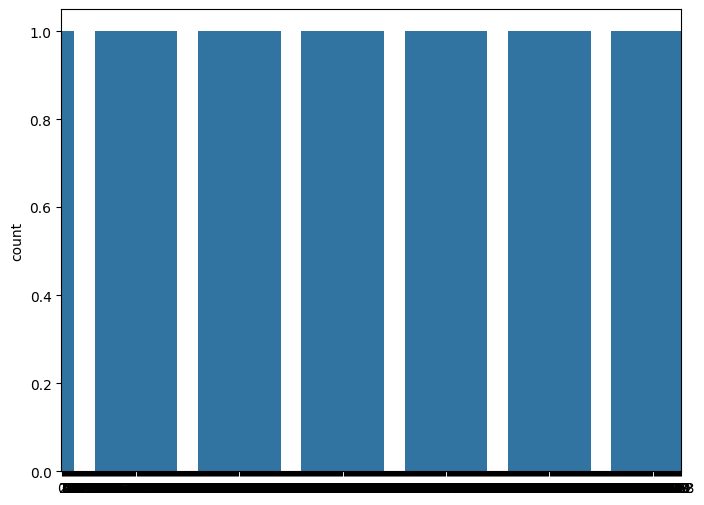

In [30]:
#Quel sont concretement le pourcentage de chacun d'eux?
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[1]/len(target)
no=target.value_counts()[0]/len(target)
print(f'Le pourcentage des crédits accordé est : {yes}')
print(f'Le pourcentage des crédits non accordé est : {no}')

AttributeError: 'BarContainer' object has no attribute 'get_height'

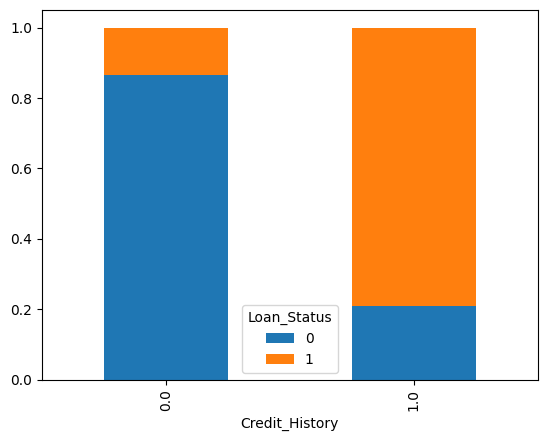

In [31]:
#Quel est l'influence de la variable Credit_History?
ct = pd.crosstab(df['Credit_History'], df['Loan_Status'])

# Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

# Créer le graphique à barres
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage aux barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))

# Ajouter les titres et les echelles
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Relationship between Categorical Feature and Target Variable')
plt.legend(title='Loan_Status', loc='upper right')

# Afficher le graphe
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

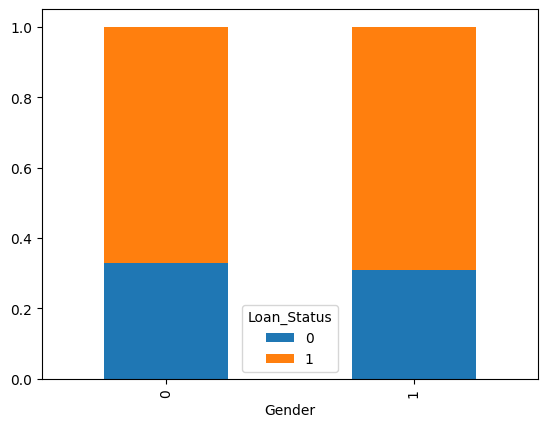

In [32]:
#Quel est l'influence de la variable Gender?

ct = pd.crosstab(df['Gender'], df['Loan_Status'])

# Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

# Créer le graphique à barres
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage à la barre
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))

# Ajoutons les titres et les echelles
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Categorical Feature and Target Variable')
plt.legend(title='Loan_Status', loc='upper right')

# Show the plot
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

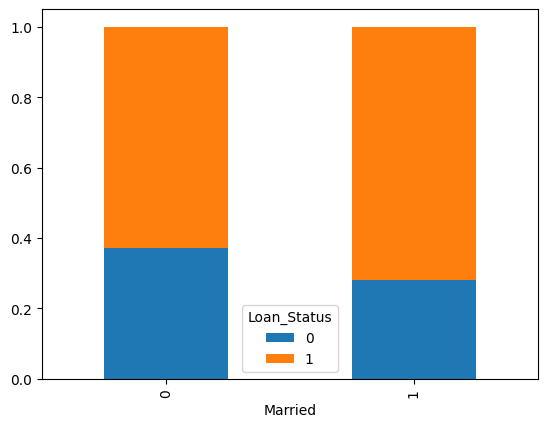

In [33]:
#Quel est l'influence de la variable Married?
ct = pd.crosstab(df['Married'], df['Loan_Status'])

# Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

#Créer le graphique à barres
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage aux barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))

# Ajoutons les titres et les echelles
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Relationship between Categorical Feature and Target Variable')
plt.legend(title='Loan_Status', loc='upper right')

# Afficher le graphe
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

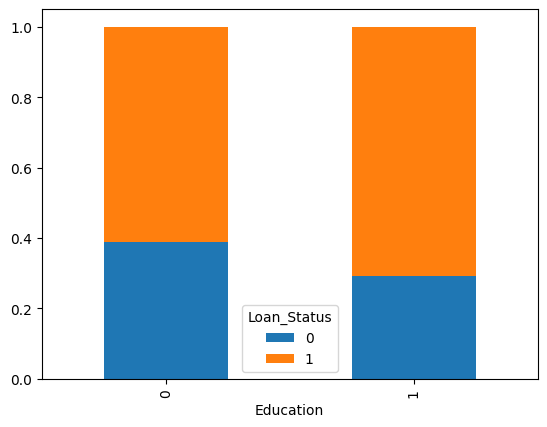

In [34]:
#Quel est l'influence de la variable Education?
ct = pd.crosstab(df['Education'], df['Loan_Status'])


# Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

# Créer le graphique à barres
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage aux barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))

# Ajouter des étiquettes et un titre
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Relationship between Categorical Feature and Target Variable')
plt.legend(title='Loan_Status', loc='upper right')

# Afficher le graphe
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

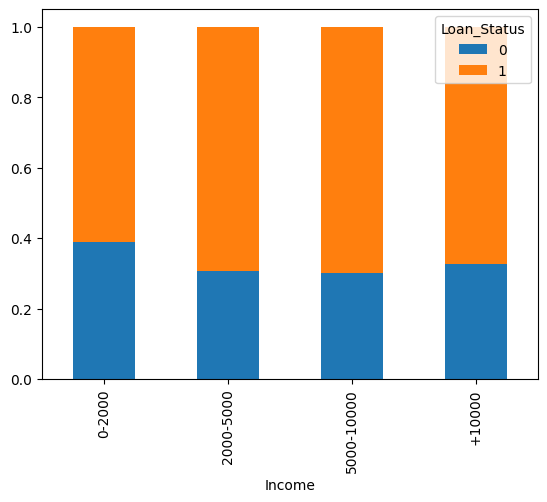

In [35]:
#Analysons les variables numeriques maintenant 

#Quel est l'inflence du revenu du demandeur?
#Comme le minimum eu c'est 150 et le maximum 81.000 on va separer en 10 par de 10.000
df['Income'] = pd.cut(df['ApplicantIncome'], bins=[ 0, 2000, 5000, 10000, 100000000  ], labels=['0-2000', '2000-5000', '5000-10000', '+10000'])

# Créer un tableau croisé de "age_group" et une variable cible binaire appelée "y"
ct = pd.crosstab(df['Income'], df['Loan_Status'])


#Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

# Create the bar plot
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage aux barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))
    
# Ajouter une légende et des étiquettes d'axe
plt.legend(title='Loan_Status')
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

# Afficher le graphe
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

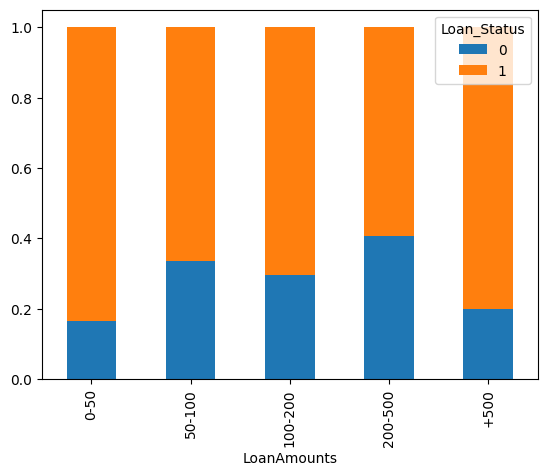

In [36]:
#Quel est l'inflence du montant du credit?
#Comme le minimum eu c'est 9 et le maximum 700 et la moyenne c'est 100
df['LoanAmounts'] = pd.cut(df['LoanAmount'], bins=[ 0, 50, 100, 200, 500, 10000000000  ], labels=['0-50', '50-100', '100-200', '200-500', '+500'])

# Créer un tableau croisé de "age_group" et une variable cible binaire appelée "y"
ct = pd.crosstab(df['LoanAmounts'], df['Loan_Status'])

#Calculer le pourcentage de chaque catégorie dans chaque groupe de revenu
ct_percent = ct.div(ct.sum(axis=1), axis=0)

# Créer le graphique à barres
ax = ct_percent.plot(kind='bar', stacked=True)

# Ajouter les valeurs de pourcentage aux barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.get_height().round(2))



# Ajouter une légende et des étiquettes d'axe
plt.legend(title='Loan_Status')
plt.xlabel('LoanAmount')
plt.ylabel('Count')

# Afficher le graphe
plt.show()

In [39]:
#verifions nos bar 
# Exclure les colonnes de type 'category' pour le calcul de la médiane
df.groupby('Loan_Status')[df.select_dtypes(exclude='category').columns].median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_Status,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0,1.0


## Etape 3 : Realisation du Modele

#1 La premiere des choses à faire est de diviser la base de données en deux, l'une qui servira pour les tests et l'autre qui servira pour l'entrainement du model

In [40]:
#Procedons a la divion, le random_state est juste une valeur qui met d'obtenir le meme resultat à chaque implementation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train taille' , X_train.shape)
print('X_test taille' , X_test.shape)
print('y_train taille' , y_train.shape)
print('y_test taille' , y_test.shape)

X_train taille (491, 11)
X_test taille (123, 11)
y_train taille (491, 1)
y_test taille (123, 1)


#2 Creons notre model ! Ici tu dois te documenter sur les algorithmes pour avoir une idée  de ceux qui te serons le plus utile pour resoudre ton probleme. Ici nous allons utiliser 03 algorithme : Logistic Regression, KNN, DecisionTree

In [41]:
#Definissons nos model 
models={
    'LogisticRegression' : LogisticRegression(random_state=42),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}
#Definissons la fonction de precision (metrique)
def accu(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu : 
        return acc
    else : 
        print(f'La precision du model est : {acc}')

#definissons la fonction d'entrainement
def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression :
La precision du model est : 0.8536585365853658
------------------------------
DecisionTreeClassifier :
La precision du model est : 0.8455284552845529
------------------------------
KNeighborsClassifier :
La precision du model est : 0.6504065040650406
------------------------------


d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.ven

Une metrice est une fonctionne qui permet d'evaluer des modeles de machine learning !

In [49]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Income',
       'LoanAmounts'],
      dtype='object')

Nous allons donc creer une base de données pour le deployement de notre modele, cette base de donnee va contenir uniquement les features les plus pertinenents pour la determination de notre target cet a dire pour la decision de credit

In [61]:
X_2= X[['LoanAmount', 'ApplicantIncome', 'Dependents', 'Self_Employed', 'Credit_History', 'Married', 'CoapplicantIncome']]

In [69]:
df['Married'].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [63]:
#Entrainons 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X_2, y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train taille' , X_train.shape)
print('X_test taille' , X_test.shape)
print('y_train taille' , y_train.shape)
print('y_test taille' , y_test.shape)

X_train taille (491, 7)
X_test taille (123, 7)
y_train taille (491, 1)
y_test taille (123, 1)


In [64]:
train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression :
La precision du model est : 0.8536585365853658
------------------------------
DecisionTreeClassifier :
La precision du model est : 0.8455284552845529
------------------------------
KNeighborsClassifier :
La precision du model est : 0.6422764227642277
------------------------------


d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\FutureExpertData\Modelisation-Predictive-Decision-Credit\.ven

Ici tu es bien d'accord que nous allons utiliser l'algorithme de DecisionTreeClassifier pour deployer notre modele

## Etape 4: Deploiement du model

In [65]:
#Appliquer l'arbre de decision sur notre base de données
Classifier = DecisionTreeClassifier(max_depth=1)
Classifier.fit(X_2, y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
#Enreigistrer le modele
pickle.dump(Classifier, open('./Model/model.pkl', 'wb'))